In [21]:
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
max_features = 20000
maxlen = 250  # cut texts after this number of words (among top max_features most common words)
batch_size = 128
epochs = 3

In [23]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [24]:
print (X_train.shape, X_test.shape)

(25000,) (25000,)


In [25]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [26]:
for i in range(0, 3):
    print (len(X_train[i]))

218
189
141


In [27]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [28]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 250)
X_test shape: (25000, 250)


In [29]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [30]:
for i in range(0, 3):
    print (len(X_train[i]))

250
250
250


In [31]:
# build model:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 32)           640000    
                                                                 
 dropout_2 (Dropout)         (None, 250, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 657,025
Trainable params: 657,025
Non-tr

In [32]:
# train:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/3


157/157 [==============================] - 118s 664ms/step - loss: 0.4566 - accuracy: 0.7731 - val_loss: 0.2894 - val_accuracy: 0.8812
Epoch 2/3
157/157 [==============================] - 103s 653ms/step - loss: 0.2147 - accuracy: 0.9166 - val_loss: 0.2806 - val_accuracy: 0.8824
Epoch 3/3
157/157 [==============================] - 92s 585ms/step - loss: 0.1310 - accuracy: 0.9541 - val_loss: 0.3120 - val_accuracy: 0.8744


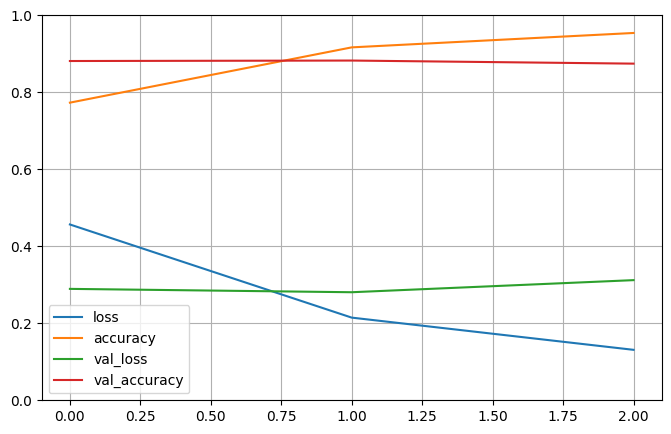

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
predictions = model.predict(X_test)

# To get a clearer view of forecasts, it can be created in binary format:
binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

# Some predicted values can be displayed alongside the actual values for comparison
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

# Model evaluation
# This will give the overall accuracy of the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 66s 82ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 68s 87ms/step - loss: 0.3388 - accuracy: 0.8688
Test Loss: 0.3387672007083893
Test Accuracy: 0.8687999844551086
